In [5]:
import pandas as pd
import seaborn as sns
import numpy as np

In [6]:
fd = pd.read_csv('C:\\Users\\mohamedsobhy\\Desktop\\lec09\\simple linear regression\\117 01Students.csv')

In [7]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hours   30 non-null     int64
 1   Marks   30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [8]:
fd.head()

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42


In [9]:
fd.corr()

,Hours,Marks
Hours,1.000000,0.913894
Marks,0.913894,1.000000


In [10]:
fd.describe()

,Hours,Marks
count,30.000000,30.000000
mean,5.200000,61.400000
std,3.188341,17.734828
min,0.000000,33.000000
25%,3.000000,45.250000
50%,5.000000,60.000000
75%,7.750000,77.000000
max,11.000000,89.000000


In [11]:
fd['Hours'].median()

5.0

In [12]:
fd['Hours'].mean()

5.2

In [13]:
fd['Hours'].mode()

0    1
1    3
2    7
dtype: int64

In [14]:
fd.loc[fd['Hours'] == 0 , 'Hours']

0    0
Name: Hours, dtype: int64

In [15]:
fd.loc[fd['Hours'] == 0 , 'Hours'] = fd['Hours'].median()
fd.describe()

,Hours,Marks
count,30.000000,30.000000
mean,5.366667,61.400000
std,3.034097,17.734828
min,1.000000,33.000000
25%,3.000000,45.250000
50%,5.000000,60.000000
75%,7.750000,77.000000
max,11.000000,89.000000


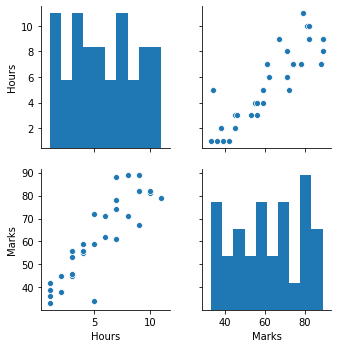

In [16]:
sns.pairplot(fd)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019048125988>,
      dtype=object)

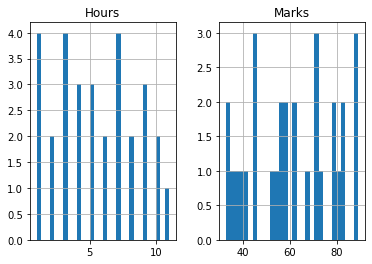

In [17]:
fd.hist(bins=30)

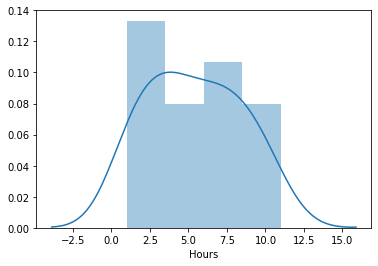

In [18]:
sns.distplot(fd['Hours'])

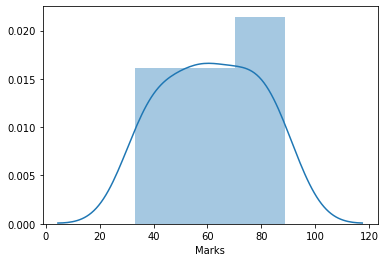

In [19]:
sns.distplot(fd['Marks'])

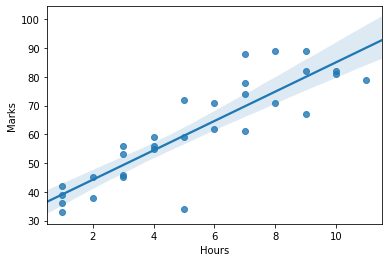

In [20]:
sns.regplot(x=fd['Hours'], y=fd['Marks'])

C:\Users\mohamedsobhy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\mohamedsobhy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\mohamedsobhy\Anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\mohamedsobhy\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


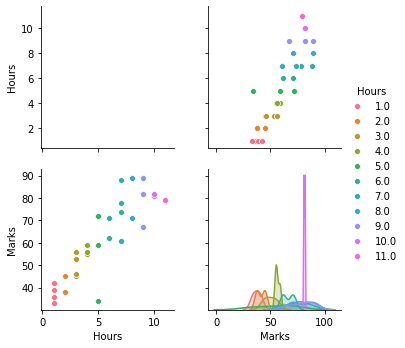

In [21]:
sns.pairplot(fd,hue='Hours')

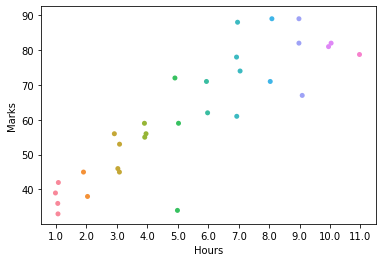

In [22]:
sns.stripplot(x=fd['Hours'],y=fd['Marks'],data=fd)

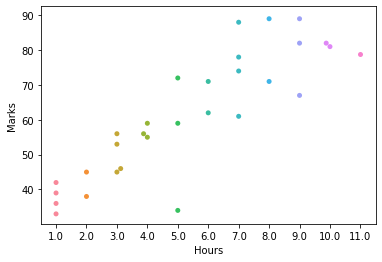

In [23]:
sns.swarmplot(x=fd['Hours'],y=fd['Marks'],data=fd)

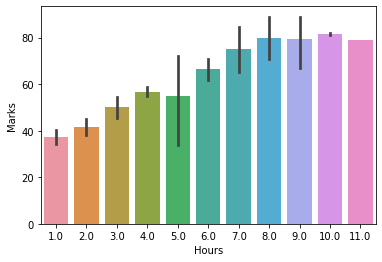

In [24]:
sns.barplot(x=fd['Hours'],y=fd['Marks'],data=fd)

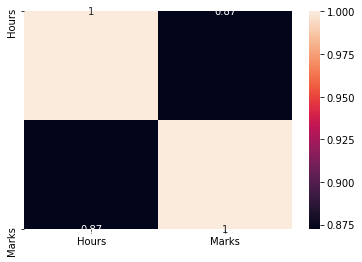

In [25]:
sns.heatmap(fd.corr(),annot=True)

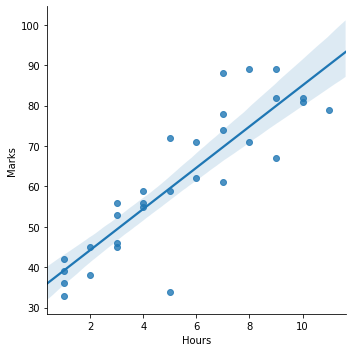

In [26]:
sns.lmplot(x='Hours',y='Marks',data=fd)

In [28]:
q1 = fd.quantile(0.25)

In [29]:
q1

Hours     3.00
Marks    45.25
Name: 0.25, dtype: float64

In [30]:
q3 = fd.quantile(0.75)
q3

Hours     7.75
Marks    77.00
Name: 0.75, dtype: float64

In [31]:
IQR = q3 -q1
IQR

Hours     4.75
Marks    31.75
dtype: float64

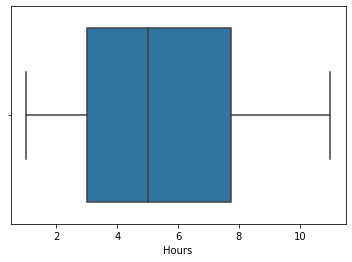

In [32]:
sns.boxplot(x=fd['Hours'])

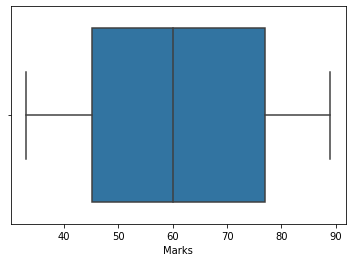

In [33]:
sns.boxplot(x=fd['Marks'])

In [36]:
fd2 = fd.copy()
fd2

,Hours,Marks
0,5.0,34
1,1.0,36
2,1.0,33
3,1.0,39
4,1.0,42
5,2.0,45
6,2.0,38
7,3.0,45
8,3.0,53
9,3.0,46


In [35]:
from sklearn.model_selection import train_test_split

In [37]:
x= fd2.drop(["Marks"],axis=1)
y=fd2['Marks']

In [38]:
x_train ,  x_test ,y_train , y_test = train_test_split(x,y,test_size=0.3)

In [39]:
x_train

,Hours
6,2.0
5,2.0
0,5.0
4,1.0
12,4.0
9,3.0
29,11.0
3,1.0
10,3.0
16,6.0


In [40]:
y_train

6     38
5     45
0     34
4     42
12    55
9     46
29    79
3     39
10    56
16    62
18    78
26    89
27    81
7     45
24    82
25    67
28    82
1     36
11    59
20    61
8     53
Name: Marks, dtype: int64

In [41]:
df_train = pd.concat([x_train,y_train],axis=1) 

In [42]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(21, 1) (9, 1) (21,) (9,)


In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_hat = model.predict(x_test)
y_hat

array([71.4567693 , 57.4088992 , 57.4088992 , 66.77414593, 52.72627583,
       66.77414593, 62.09152256, 71.4567693 , 38.67840574])

In [46]:
y_test

22    71
14    72
15    59
19    88
13    56
21    74
17    71
23    89
2     33
Name: Marks, dtype: int64

In [47]:
model.score(x_train,y_train)

0.8010234645137276

In [51]:
model.score(x_test,y_test)

0.5135400944176881

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
np.sqrt(mean_squared_error(y_test,y_hat))

11.296399554131385

In [54]:
model.predict([[10]])

array([80.82201603])

In [55]:
model.coef_

array([4.68262337])

In [56]:
model.intercept_

33.9957823703079

In [57]:
import matplotlib.pyplot as plt

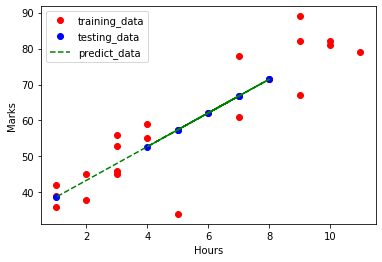

In [58]:
plt.plot(x_train,y_train,'ro',label="training_data")
plt.plot(x_test,y_hat,'bo',label="testing_data")
plt.plot(x_test,y_hat,'g--',label="predict_data")
plt.xlabel("Hours")
plt.ylabel("Marks")
plt.legend()